<a href="https://colab.research.google.com/github/ezta91/Esther-Erommonsele/blob/main/Data_on_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
data = pd.read_csv('smoking_health_data_final.csv')
print(data)

      age   sex current_smoker  heart_rate blood_pressure  cigs_per_day   chol
0      54  male            yes          95         110/72           NaN  219.0
1      45  male            yes          64         121/72           NaN  248.0
2      58  male            yes          81       127.5/76           NaN  235.0
3      42  male            yes          90       122.5/80           NaN  225.0
4      42  male            yes          62         119/80           NaN  226.0
...   ...   ...            ...         ...            ...           ...    ...
3895   37  male            yes          88     122.5/82.5          60.0  254.0
3896   49  male            yes          70         123/75          60.0  213.0
3897   56  male            yes          70         125/79          60.0  246.0
3898   50  male            yes          85         134/95          60.0  340.0
3899   40  male            yes          98         132/86          70.0  210.0

[3900 rows x 7 columns]


In [3]:
print(data.head())

   age   sex current_smoker  heart_rate blood_pressure  cigs_per_day   chol
0   54  male            yes          95         110/72           NaN  219.0
1   45  male            yes          64         121/72           NaN  248.0
2   58  male            yes          81       127.5/76           NaN  235.0
3   42  male            yes          90       122.5/80           NaN  225.0
4   42  male            yes          62         119/80           NaN  226.0


In [4]:
print(data.tail())

      age   sex current_smoker  heart_rate blood_pressure  cigs_per_day   chol
3895   37  male            yes          88     122.5/82.5          60.0  254.0
3896   49  male            yes          70         123/75          60.0  213.0
3897   56  male            yes          70         125/79          60.0  246.0
3898   50  male            yes          85         134/95          60.0  340.0
3899   40  male            yes          98         132/86          70.0  210.0


In [5]:
data.dtypes

,0
age,int64
sex,object
current_smoker,object
heart_rate,int64
blood_pressure,object
cigs_per_day,float64
chol,float64


In [6]:
data.describe()

,age,heart_rate,cigs_per_day,chol
count,3900.000000,3900.000000,3886.000000,3893.000000
mean,49.537949,75.688974,9.168554,236.595941
std,8.559275,12.015376,12.037999,44.375365
min,32.000000,44.000000,0.000000,113.000000
25%,42.000000,68.000000,0.000000,206.000000
50%,49.000000,75.000000,0.000000,234.000000
75%,56.000000,82.000000,20.000000,263.000000
max,70.000000,143.000000,70.000000,696.000000


In [7]:
#check for missing values
data.isnull().sum()

,0
age,0
sex,0
current_smoker,0
heart_rate,0
blood_pressure,0
cigs_per_day,14
chol,7


In [8]:
# Input missing numeric values with the median of their respective columns
for column in ['heart_rate', 'cigs_per_day', 'chol']:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)


data.isnull().sum()

/tmp/ipython-input-1249485133.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median_value, inplace=True)


,0
age,0
sex,0
current_smoker,0
heart_rate,0
blood_pressure,0
cigs_per_day,0
chol,0


In [9]:
# Split 'blood_pressure' into two separate columns 'systolic_bp' and 'diastolic_bp'
data[['systolic_bp', 'diastolic_bp']] = data['blood_pressure'].str.split('/', expand=True).astype(float)

In [11]:
# Summarize key statistics for each variable
summary_statistics = data.describe().T
summary_statistics['range'] = summary_statistics['max'] - summary_statistics['min']
print(summary_statistics)

               count        mean        std    min    25%    50%    75%  \
age           3900.0   49.537949   8.559275   32.0   42.0   49.0   56.0   
heart_rate    3900.0   75.688974  12.015376   44.0   68.0   75.0   82.0   
cigs_per_day  3900.0    9.135641  12.028875    0.0    0.0    0.0   20.0   
chol          3900.0  236.591282  44.335649  113.0  206.0  234.0  263.0   
systolic_bp   3900.0  132.395385  21.976335   83.5  117.0  128.0  144.0   
diastolic_bp  3900.0   82.987179  11.918623   48.0   75.0   82.0   90.0   

                max  range  
age            70.0   38.0  
heart_rate    143.0   99.0  
cigs_per_day   70.0   70.0  
chol          696.0  583.0  
systolic_bp   295.0  211.5  
diastolic_bp  142.5   94.5  


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#set age group for better data analysis
data['age_group'] = pd.cut(data['age'], bins=[30, 40, 50, 60, 70], labels=['30-40', '40-50', '50-60', '60-70'])
display(data.head())

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol,systolic_bp,diastolic_bp,age_group
0,54,male,yes,95,110/72,0.0,219.0,110.0,72.0,50-60
1,45,male,yes,64,121/72,0.0,248.0,121.0,72.0,40-50
2,58,male,yes,81,127.5/76,0.0,235.0,127.5,76.0,50-60
3,42,male,yes,90,122.5/80,0.0,225.0,122.5,80.0,40-50
4,42,male,yes,62,119/80,0.0,226.0,119.0,80.0,40-50


In [13]:
#analyze the distribution of smoking status against the different age groups and gender
smoking_status_distribution = (data.groupby(['age_group', 'sex', 'current_smoker']).size().unstack(fill_value=0))
print(smoking_status_distribution)


current_smoker     no  yes
age_group sex             
30-40     female  162  195
          male    111  222
40-50     female  395  389
          male    231  476
50-60     female  451  188
          male    244  303
60-70     female  246   55
          male    128  104


/tmp/ipython-input-2066570901.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoking_status_distribution = (data.groupby(['age_group', 'sex', 'current_smoker']).size().unstack(fill_value=0))


smoking_status_distribution = pd.crosstab(index=[data['age_group'], data['sex']], columns = data['current_smoker'])
print(smoking_status_distribution)

In [19]:
smoking_status_distribution = pd.crosstab(index=[data['age_group'], data['sex']], columns = data['current_smoker'])
print(smoking_status_distribution)

current_smoker     no  yes
age_group sex             
30-40     female  162  195
          male    111  222
40-50     female  395  389
          male    231  476
50-60     female  451  188
          male    244  303
60-70     female  246   55
          male    128  104


In [16]:
#calculate the percentage smoking status within each age group and gender category
smoking_percentage = smoking_status_distribution.div(smoking_status_distribution.sum(axis=1), axis=0) * 100
print("\nPercentage of Smokers within each Age Group and Gender Category:\n", smoking_percentage)


Percentage of Smokers within each Age Group and Gender Category:
 current_smoker           no        yes
age_group sex                         
30-40     female  45.378151  54.621849
          male    33.333333  66.666667
40-50     female  50.382653  49.617347
          male    32.673267  67.326733
50-60     female  70.579030  29.420970
          male    44.606947  55.393053
60-70     female  81.727575  18.272425
          male    55.172414  44.827586


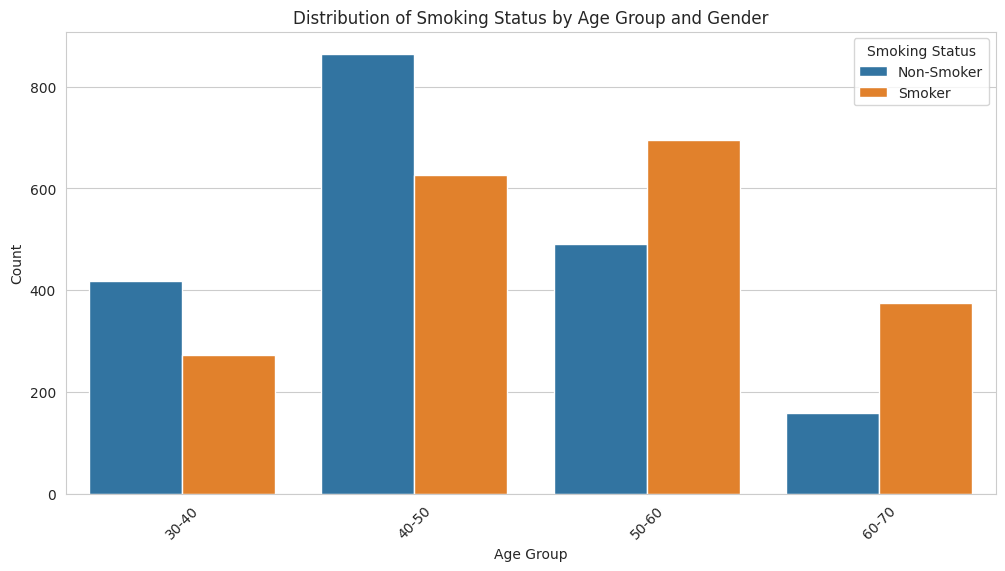

In [15]:
#Visualize the distribution of smoking status between the two different categories
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='age_group', hue='current_smoker')
plt.title('Distribution of Smoking Status by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Smoking Status by Age Group and Gender')
plt.xticks(rotation=45)
plt.legend(title='Smoking Status', labels=['Non-Smoker', 'Smoker'])
plt.show()

Text(0, 0.5, 'Percentage')

<Figure size 1200x600 with 0 Axes>

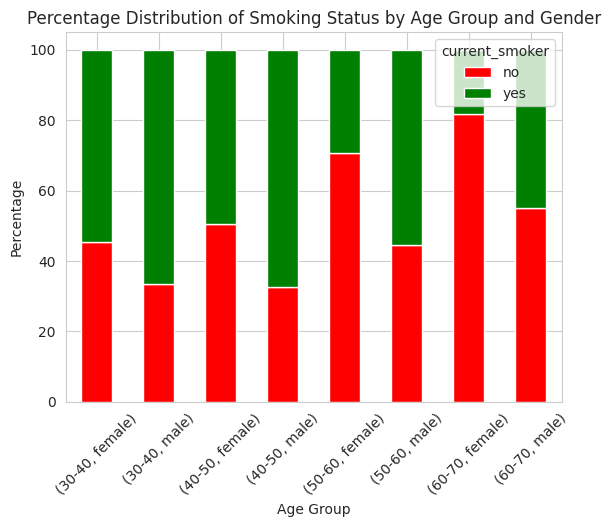

In [16]:
#Visualize the percentage distribution of smoking status between the two different categories
plt.figure(figsize=(12, 6))
smoking_percentage.plot(kind='bar', stacked=True, color = ['red', 'green'])
plt.xticks(rotation=45)
plt.title('Percentage Distribution of Smoking Status by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Percentage')

In [20]:
# Statistical analysis
# Import necessary libraries for statistical testing
from scipy.stats import ttest_ind

In [21]:
# Identify relevant indicators for health information data
health_data = data[['current_smoker', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'cigs_per_day', 'chol']]

In [23]:
# split data into smokers and nonsmokers
smokers = health_data[health_data['current_smoker'] == 'Yes']
nonsmokers = health_data[health_data['current_smoker'] == 'No']

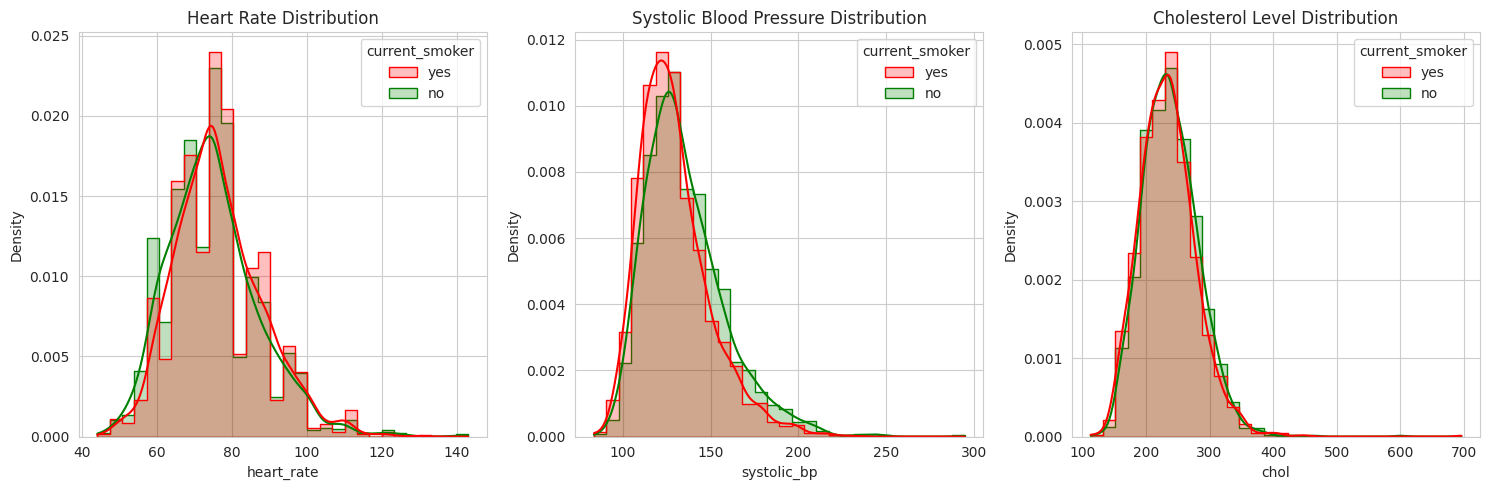

In [29]:
# Visualize health indicators for smokers and nonsmokers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Heart rate
sns.histplot(data=data, x='heart_rate', hue='current_smoker', bins=30, kde=True,
             ax=axes[0], stat='density', element='step', palette={'yes': 'red', 'no': 'green'})
axes[0].set_title("Heart Rate Distribution")

# Blood Pressure (Systolic)
sns.histplot(data=data, x='systolic_bp', hue='current_smoker', bins=30, kde=True,
             ax=axes[1], stat='density', element='step', palette={'yes': 'red', 'no': 'green'})
axes[1].set_title("Systolic Blood Pressure Distribution")

# Cholesterol Levels
sns.histplot(data=data, x='chol', hue='current_smoker', bins=30, kde=True,
             ax=axes[2], stat='density', element='step', palette={'yes': 'red', 'no': 'green'})
axes[2].set_title("Cholesterol Level Distribution")

plt.tight_layout()
plt.show()

In [34]:
# Perform z-tests to assess the differences in means between smokers and non-smokers
for column in ['heart_rate', 'systolic_bp', 'diastolic_bp', 'cigs_per_day', 'chol']:
    t_statistic, p_value = ttest_ind(smokers[column], nonsmokers[column])

    print(f"Z-test for {column}:")
    print(f"   T-statistic: {t_statistic}")
    print(f"   P-value: {p_value}")

Z-test for heart_rate:
   T-statistic: nan
   P-value: nan
Z-test for systolic_bp:
   T-statistic: nan
   P-value: nan
Z-test for diastolic_bp:
   T-statistic: nan
   P-value: nan
Z-test for cigs_per_day:
   T-statistic: nan
   P-value: nan
Z-test for chol:
   T-statistic: nan
   P-value: nan


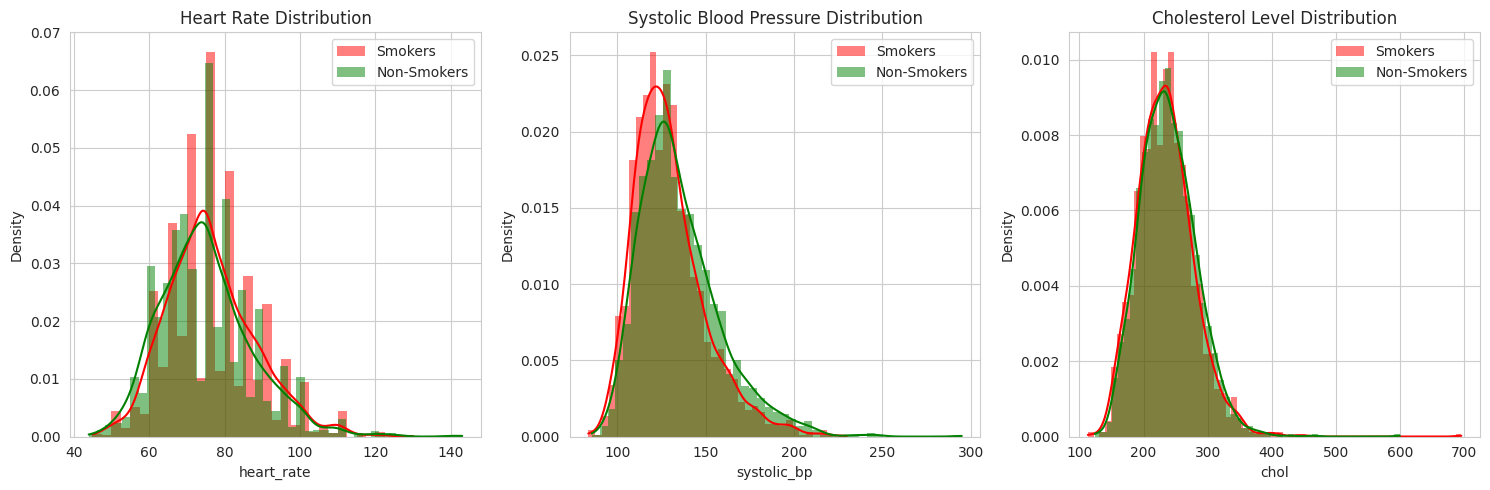

T-test results for Heart Rate: TtestResult(statistic=np.float64(3.579584820675851), pvalue=np.float64(0.00034833312553790417), df=np.float64(3898.0))
T-test results for Systolic Blood Pressure: TtestResult(statistic=np.float64(-8.528329524098611), pvalue=np.float64(2.0950010778917888e-17), df=np.float64(3898.0))
T-test results for Cholesterol Levels: TtestResult(statistic=np.float64(-2.9135033435100053), pvalue=np.float64(0.0035943048293932767), df=np.float64(3898.0))


In [35]:
# Import necessary libraries for statistical testing
from scipy.stats import ttest_ind

# Select only the relevant columns for health indicators
health_data = data[['current_smoker', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'chol']]

# Split the data into smokers and non-smokers
smokers = health_data[health_data['current_smoker'] == 'yes']
nonsmokers = health_data[health_data['current_smoker'] == 'no']

# Visualize the distributions of health indicators for smokers and non-smokers
plt.figure(figsize=(15, 5))

# Heart Rate
plt.subplot(1, 3, 1)
sns.histplot(smokers['heart_rate'], color='red', label='Smokers', kde=True, stat="density", linewidth=0)
sns.histplot(nonsmokers['heart_rate'], color='green', label='Non-Smokers', kde=True, stat="density", linewidth=0)
plt.title('Heart Rate Distribution')
plt.legend()

# Blood Pressure (Systolic)
plt.subplot(1, 3, 2)
sns.histplot(smokers['systolic_bp'], color='red', label='Smokers', kde=True, stat="density", linewidth=0)
sns.histplot(nonsmokers['systolic_bp'], color='green', label='Non-Smokers', kde=True, stat="density", linewidth=0)
plt.title('Systolic Blood Pressure Distribution')
plt.legend()

# Cholesterol Levels
plt.subplot(1, 3, 3)
sns.histplot(smokers['chol'], color='red', label='Smokers', kde=True, stat="density", linewidth=0)
sns.histplot(nonsmokers['chol'], color='green', label='Non-Smokers', kde=True, stat="density", linewidth=0)
plt.title('Cholesterol Level Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Perform t-tests to assess the differences in means between smokers and non-smokers
t_test_heart_rate = ttest_ind(smokers['heart_rate'], nonsmokers['heart_rate'])
t_test_systolic_bp = ttest_ind(smokers['systolic_bp'], nonsmokers['systolic_bp'])
t_test_chol = ttest_ind(smokers['chol'], nonsmokers['chol'])

print("T-test results for Heart Rate:", t_test_heart_rate)
print("T-test results for Systolic Blood Pressure:", t_test_systolic_bp)
print("T-test results for Cholesterol Levels:", t_test_chol)

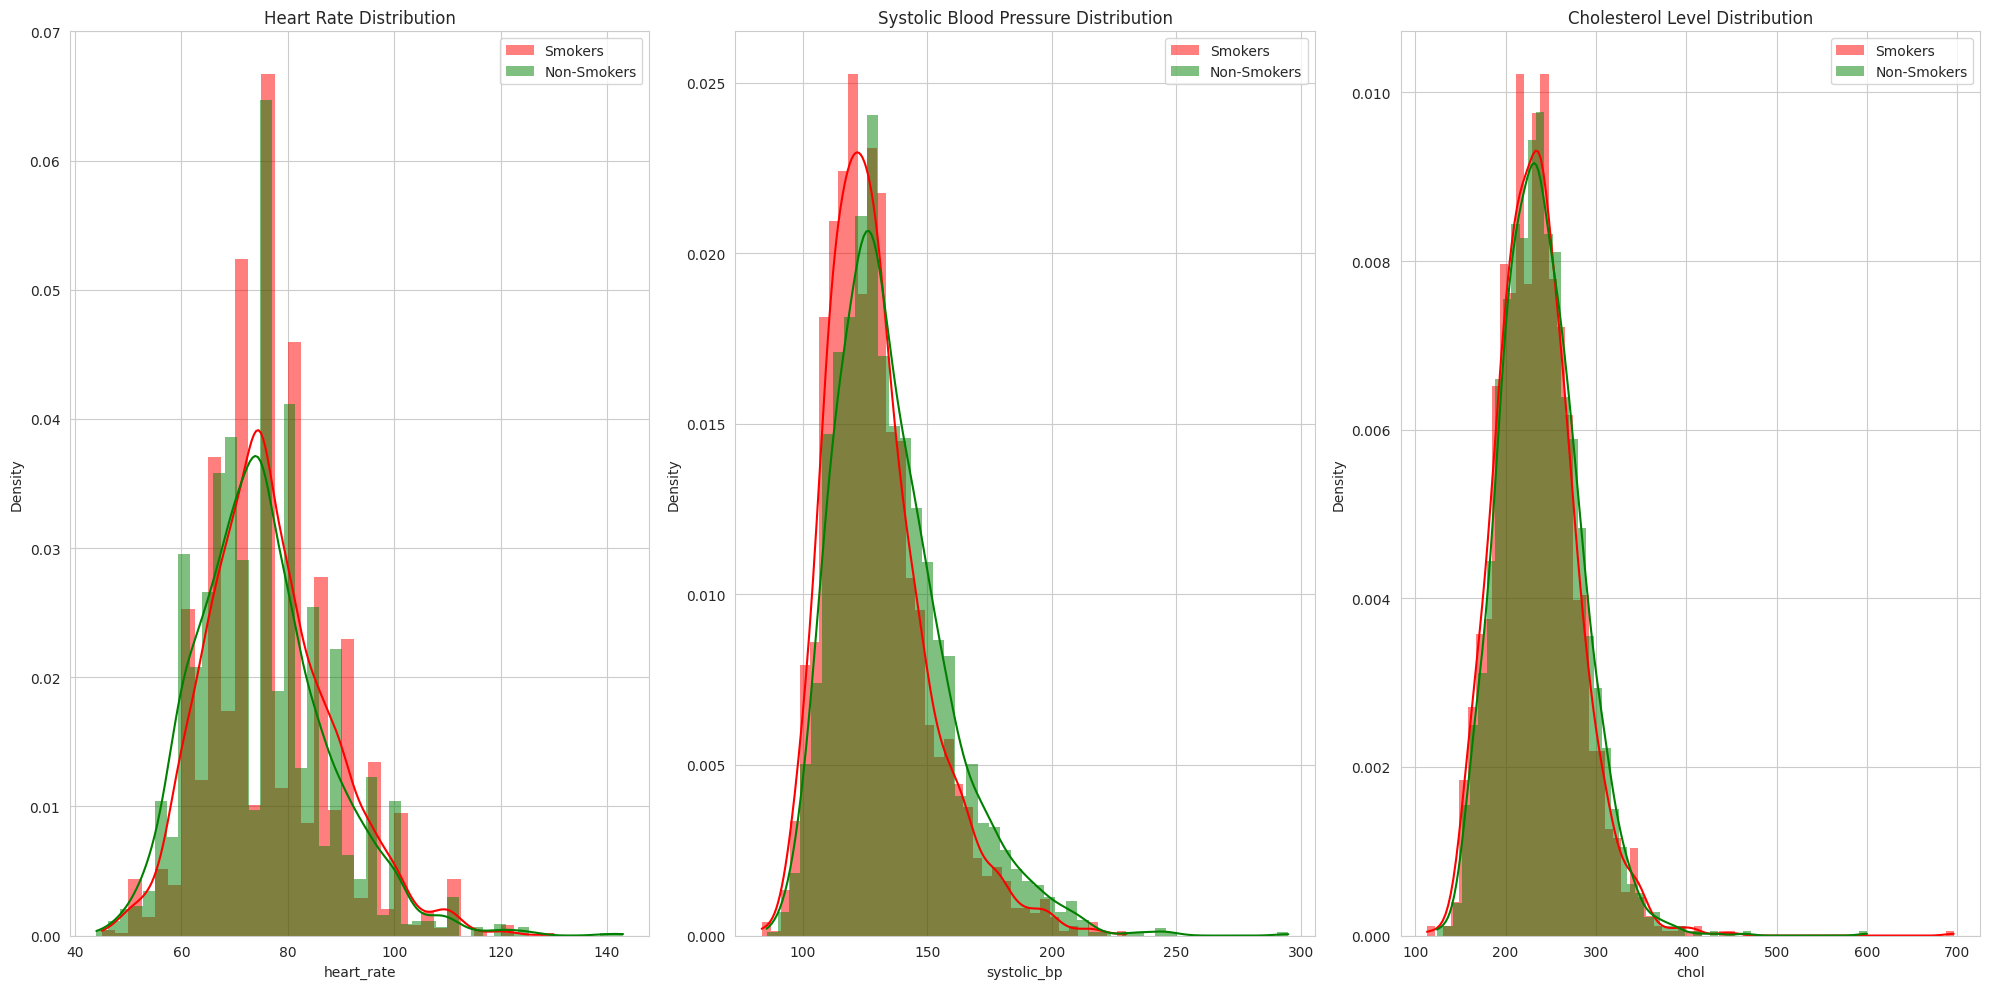

Z-test results for Heart Rate: Z-statistic: 3.579584820675851 P-value: 0.0003441405344898659
Z-test results for Systolic Blood Pressure: Z-statistic: -8.528329524098611 P-value: 1.4847609687114262e-17
Z-test results for Cholesterol Levels: Z-statistic: -2.9135033435100053 P-value: 0.0035739800980142647


In [38]:
# Import necessary libraries for statistical testing
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest as ztest_ind

# Select only the relevant columns for health indicators
health_data = data[['current_smoker', 'heart_rate', 'systolic_bp', 'diastolic_bp', 'chol']]

# Split the data into smokers and non-smokers
smokers = health_data[health_data['current_smoker'] == 'yes']
nonsmokers = health_data[health_data['current_smoker'] == 'no']

# Visualize the distributions of health indicators for smokers and non-smokers
plt.figure(figsize=(20, 10))

# Heart Rate
plt.subplot(1, 3, 1)
sns.histplot(smokers['heart_rate'], color='red', label='Smokers', kde=True, stat="density", linewidth=0)
sns.histplot(nonsmokers['heart_rate'], color='green', label='Non-Smokers', kde=True, stat="density", linewidth=0)
plt.title('Heart Rate Distribution')
plt.legend()

# Blood Pressure (Systolic)
plt.subplot(1, 3, 2)
sns.histplot(smokers['systolic_bp'], color='red', label='Smokers', kde=True, stat="density", linewidth=0)
sns.histplot(nonsmokers['systolic_bp'], color='green', label='Non-Smokers', kde=True, stat="density", linewidth=0)
plt.title('Systolic Blood Pressure Distribution')
plt.legend()

# Cholesterol Levels
plt.subplot(1, 3, 3)
sns.histplot(smokers['chol'], color='red', label='Smokers', kde=True, stat="density", linewidth=0)
sns.histplot(nonsmokers['chol'], color='green', label='Non-Smokers', kde=True, stat="density", linewidth=0)
plt.title('Cholesterol Level Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Perform z-tests to assess the differences in means between smokers and non-smokers
z_test_heart_rate, p_value_heart_rate = ztest_ind(smokers['heart_rate'], nonsmokers['heart_rate'])
z_test_systolic_bp, p_value_systolic_bp = ztest_ind(smokers['systolic_bp'], nonsmokers['systolic_bp'])
z_test_chol, p_value_chol = ztest_ind(smokers['chol'], nonsmokers['chol'])

print("Z-test results for Heart Rate:", "Z-statistic:", z_test_heart_rate, "P-value:", p_value_heart_rate)
print("Z-test results for Systolic Blood Pressure:", "Z-statistic:", z_test_systolic_bp, "P-value:", p_value_systolic_bp)
print("Z-test results for Cholesterol Levels:", "Z-statistic:", z_test_chol, "P-value:", p_value_chol)

Heart Rate
Z-statistic: 3.58
The sample mean is 3.58 standard deviations above the population mean.

P-value: 0.00034
This is much less than 0.05, so you reject the null hypothesis.

Interpretation: There is strong evidence that the heart rate mean is significantly higher than the comparison mean.

Systolic Blood Pressure
Z-statistic: -8.53
The sample mean is 8.53 standard deviations below the population mean.

P-value: ~1.48e-17
Much less than 0.05, so you reject the null hypothesis.

Interpretation: There is extremely strong evidence that the mean systolic blood pressure is significantly lower than the comparison mean.

Cholesterol Levels
Z-statistic: -2.91
The sample mean is 2.91 standard deviations below the population mean.

P-value: 0.00357
Still less than 0.05, so you reject the null hypothesis.

Interpretation: There is strong evidence that the cholesterol level mean is significantly lower than the comparison mean.